In [2]:
import numpy as np
import math
import latexify

#list important:
# k_create,
# one_hot_sim, k_exp_horiz

#Set Parameters
n = 7
k_o = 0.3
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 4
q = 2

K = {}
K_exp = {}

arr_len = n-1
dual_len = (n-1) * 2
dual_len_exp = (n-1)*2 + 2
a = np.zeros(dual_len)
b = np.zeros(arr_len)
b_bar = np.zeros(arr_len)
c = np.zeros(1)
c_bar = np.zeros(1) 

def check_variables():
    print('n: ', n)
    print('alpha: ', alpha)
    print('k_s: ', k_s)
    print('k_o: ', k_o)
    print('alpha_prime: ', alpha_prime)
    print('a', a)
    print('a_exp', a_exp)
    print('b', b)
    print('c', c)

In [3]:
#K matrix without exceptions
    # return_k = false -> returns offset diagonal  
def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B        

def k_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

def y_create(n):
    A = np.ones(n-1)
    B = A * -1
    D = np.concatenate([A, B])
    return D

def a_create(n, alpha_prime):
    K = k_create(n, alpha_prime)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

In [4]:
K = k_create(n,alpha_prime)
print('K', '\n', K)
print('det:', np.linalg.det(K))

y = y_create(n)
a = a_create(n, alpha_prime)

K 
 [[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0. ]
 [0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  1. ]]
det: 0.35744973264100016


In [5]:
def test_Ka_y():
    assert np.allclose(K@a, y), "if not equal"
    print('test: K@a = y', '\n')

test_Ka_y()

test: K@a = y 



In [6]:
#creates a vector for exceptions (only works for exception cases!)
def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

#sides matrix in k_exp representing exceptions
def k_exp_horiz(n, p, q, alpha_prime):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = alpha_prime * np.block([[A,C],[B,D]])
    return E

def k_create_excep(n, p, q, alpha_prime):
    K = k_create(n, alpha_prime)
    E_1 = k_exp_horiz(n, p, q, alpha_prime)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

def y_create_exp(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D

def a_exp_create(n, p, q, alpha_prime):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    y_exp = y_create_exp(n)
    a_exp = np.linalg.solve(K_exp, y_exp)
    return a_exp


In [7]:
K_exp = k_create_excep(n, p, q, alpha_prime)
print('K_exp', '\n',K_exp)
np.linalg.det(K_exp)
y_exp = y_create_exp(n)
a_exp = a_exp_create(n, p, q, alpha_prime)

print('y', y)
print('K@a', K@a, '\n')

print('y_exp', y_exp)
print('K_exp@a_exp', K_exp@a_exp, '\n')

def test_Ka_y_exp():
    assert np.allclose(K_exp@a_exp, y_exp), "if not equal"
    print('test: K_exp@a_exp = y_exp', '\n')

test_Ka_y_exp()


K_exp 
 [[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ]
 [0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.3]
 [0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0. ]
 [0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.3 0. ]
 [0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.3]
 [0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.3 0.  0.  0.3 0.  0.  0.  0.3 0.3 0.  0.  0.  1.  0. ]
 [0.  0.3 0.3 0.  0.  0.  0.3 0.  0.  0.3 0.  0.  0.  1. ]]
y [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
K@a [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.] 

y_exp [ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1

In [8]:
# Create a dictionary with keys generated using the index and values from the array
def create_bc(n,p,q,alpha_prime):
    a_exp = a_exp_create(n,p,q,alpha_prime)
    num_coeff = n-1
    b = {i: a_exp[i-1] for i in range(1, num_coeff + 1)}
    b_bar = {i: a_exp[i-1+n-1] for i in range(1, num_coeff + 1)}
    c = {1: a_exp[2 * num_coeff]}
    c_bar = {1: a_exp[2 * num_coeff + 1]}
    return b, b_bar, c, c_bar

def get_b(i):
    b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
    if i < 1 or i >= n:
        return 0
    else:
        return b[i]

#turns dictionary to array for testing
def dict_to_array(dict_arr):
    arr = np.zeros(len(dict_arr))
    for i in range(1, len(dict_arr) + 1):
       arr[i-1] = dict_arr[i]  
    return arr        

In [9]:
b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)

verif = True
for i in range(0, n-1):
    if a_exp[i] != b[i+1]:
        verif = False
    if a_exp[i+n-1] != b_bar[i+1]:
        verif = False    
    if a_exp[(2*n-2)] != c[1]:
        verif = False
    if a_exp[(2*n-1)] != c_bar[1]:
        verif = False
print('create_bc is correct')

create_bc is correct


In [10]:
check_variables()

n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
a [ 1.66361974  2.21206581  2.37659963  2.37659963  2.21206581  1.66361974
 -1.66361974 -2.21206581 -2.37659963 -2.37659963 -2.21206581 -1.66361974]
a_exp [ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
b {1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
c {1: 1.7352354168556658}


In [11]:
# For testing, we assume all variables of n, etc. are set at the beginning  
# These are:
# - n, alpha_prime, p, q

In [12]:
#test analytical solutions for b and c
verif = True

def b_exist(b, i):
    if i>0 and i<n: 
        return b[i]
    else: 
        return 0

def b_mult():
    A = tridiag(n)
    B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))

    K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(n, p) + e_i(n, q-1) - e_i(n, p-1) - e_i(n, q)))
    b_exp_analytical = B @ K_mult
    return b_exp_analytical

In [13]:
b_exp_analytical = b_mult()
c_exp_mult = 1 - ( alpha_prime * (b_exist(b,p) + b_exist(b,q-1) - b_exist(b,p-1) - b_exist(b,q)) )

b_array = dict_to_array(b)

#test b_i here later

def test_b_mult():
    assert np.allclose(b_array, b_exp_analytical)
    assert np.allclose(c[1], c_exp_mult)
    print('b_mult, c_mult formulas verified')

In [14]:
#test B

n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
a [ 1.66361974  2.21206581  2.37659963  2.37659963  2.21206581  1.66361974
 -1.66361974 -2.21206581 -2.37659963 -2.37659963 -2.21206581 -1.66361974]
a_exp [ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
b {1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
c {1: 1.7352354168556658}
check_ranks
rank:  0.49908592321755 rank_mult 0.4990859232175502
rank:  0.16453382084095058 rank_mult 0.1645338208409506
rank:  0.049360146252285166 rank_mult 0.04936014625228524
rank:  0.0 rank_mult 0.0
rank:  -0.049360146252285166 rank_mult -0.04936014625228524
rank:  -0.16453382084095058 rank_mult -0.16453382084095056
rank:  -0.49908592321755 rank_mult -0.4990859232175503
ranks are correct
0.49908592321755
0.16453382084095058
0.049360146252285166
0

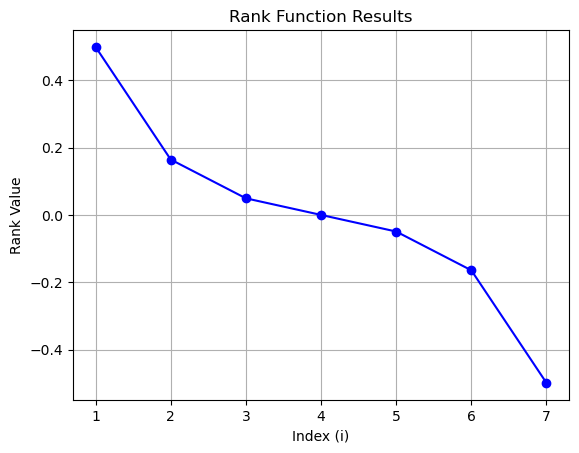

In [22]:
#Non Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases

#analytic rank
#verified
def rank(alpha, n, j):
    num = np.sinh(( ((n+1)/2) - j) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

#rank with indices
#TODO: # i = n is wrong??
def rank_mult(k_s, alpha, a, n, j):
        ind = j-1
        if j == 1:
            return k_s * ((1-alpha)/2) * (a[ind])
        elif j > 1 and j < n:
            return k_s * ((1-alpha)/2) * (a[ind] - a[ind-1])
        elif j == n:
            return k_s * ((1-alpha)/2) * (-a[ind-1])
        else:
             print('j index error')

#confirm 
def check_ranks(k_s, alpha, a, n):
    print('check_ranks')
    for j in range (1, n+1):
        rank_val = rank(alpha, n, j)
        rank_mult_val = rank_mult(k_s, alpha, a, n, j)
        print('rank: ', rank_val, 'rank_mult', rank_mult_val)    
        
        assert np.isclose(rank_val, rank_mult_val)   
    print('ranks are correct')
    
check_variables()
check_ranks(k_s, alpha, a, n)

n = 7
index = list(range(1,8))

rank_vals = {}
rank_vals_array = []

# Set variables dynamically
for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank(alpha, n, i)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals_array)
rank_results = rank_vals_array

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()

In [16]:
print(K @ a)

[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]


In [17]:
def K_row(j,k,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2])

In [18]:
check_variables()

#Verifying analytical expression for ranking
print(K_row(1,3,n,alpha_prime))
print(K_row(1,3,n,alpha_prime) @ a)
print(rank(alpha, n, 1) - rank(alpha, n, 3))
for i in range (1, n+1):
    print(rank(alpha, n, i))
print(K_row(1,3,n,alpha_prime))

n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
a [ 1.66361974  2.21206581  2.37659963  2.37659963  2.21206581  1.66361974
 -1.66361974 -2.21206581 -2.37659963 -2.37659963 -2.21206581 -1.66361974]
a_exp [ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
b {1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
c {1: 1.7352354168556658}
[0.3 0.3 0.  0.  0.  0.  0.  0.  0.3 0.  0.  0. ]
0.449725776965265
0.44972577696526483
0.49908592321755
0.16453382084095058
0.049360146252285166
0.0
-0.049360146252285166
-0.16453382084095058
-0.49908592321755
[0.3 0.3 0.  0.  0.  0.  0.  0.  0.3 0.  0.  0. ]


In [19]:
def rank_results_array(j, k, arr):
    return arr[j-1] - arr[k-1]

#verifying the graph above makes sense
def check_rank(results_array):
    for i in range (1, n):
        for j in range (1, n):
            print('i,j', i, j)
            if i != j and j != i+1 and j != i-1 and not(i == p  and j == q) and not (i == q  and j == p):
                rank_results = rank_results_array(i,j, results_array)
                func_results = K_row(i,j,n,alpha_prime)@a
                print(rank_results, func_results)
                if math.isclose(rank_results,func_results)  == True:
                    continue
                else:
                    print(' error at i: ' f'{i}', 'j:' f'{j}' )
                    return False
            else: 
                continue
    return True

check_rank(rank_vals_array)

i,j 1 1
i,j 1 2
i,j 1 3
0.44972577696526483 0.449725776965265
i,j 1 4
0.49908592321755 0.4990859232175502
i,j 1 5
0.5484460694698352 0.5484460694698353
i,j 1 6
0.6636197440585005 0.6636197440585009
i,j 2 1
i,j 2 2
i,j 2 3
i,j 2 4
i,j 2 5
0.21389396709323574 0.21389396709323583
i,j 2 6
0.32906764168190117 0.32906764168190117
i,j 3 1
-0.44972577696526483 -0.44972577696526506
i,j 3 2
i,j 3 3
i,j 3 4
i,j 3 5
0.09872029250457033 0.0987202925045704
i,j 3 6
0.21389396709323574 0.21389396709323583
i,j 4 1
-0.49908592321755 -0.4990859232175503
i,j 4 2
i,j 4 3
i,j 4 4
i,j 4 5
i,j 4 6
0.16453382084095058 0.1645338208409506
i,j 5 1
-0.5484460694698352 -0.5484460694698355
i,j 5 2
-0.21389396709323574 -0.21389396709323583
i,j 5 3
-0.09872029250457033 -0.09872029250457043
i,j 5 4
i,j 5 5
i,j 5 6
i,j 6 1
-0.6636197440585005 -0.6636197440585009
i,j 6 2
-0.32906764168190117 -0.3290676416819015
i,j 6 3
-0.21389396709323574 -0.21389396709323594
i,j 6 4
-0.16453382084095058 -0.16453382084095067
i,j 6 5
i,j

True

all code above works! graph works as seen above in the check

In [20]:
#Rank

def delta(i,j):
    if i == j:
        return 1
    else:
        return 0

#finding rank_exp with multiplication
def rank_method2(j, b, c, alpha_prime):
    rank = alpha_prime * ( b_exist(b,n,j-1) - b_exist(b,n,j) + ( c[1] * ( delta(j, q) - delta(j, p) ) ) )
    return rank

print(b_exist(b,7,1))
print(delta(1,4))
print(rank_method2(1,b,c,alpha_prime))
print(alpha_prime * (0 - b[1]))

print(b)

TypeError: b_exist() takes 2 positional arguments but 3 were given

In [23]:
# Exception Ranking by formula

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

lamb_val = lamb(alpha)

#non adjacent test cases
def rank_exp(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = []

# Set variables dynamically
for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank_method2(i, b, c, alpha_prime)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals)
print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


TypeError: b_exist() takes 2 positional arguments but 3 were given

In [ ]:
def K_row_exp(j,k,p,q,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

print(K_row_exp(1,2,4,2,7,alpha_prime))

[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]


In [ ]:
rank_results_exp = rank_vals_array

check_variables()

def rank_results_array(j, k, arr):
    return arr[k-1] - arr[j-1]

j = 1
k = 3
print('1', rank_vals_array[k-1] - rank_vals_array[j-1])

print('2', K_row_exp(j,k,p,q,n,alpha_prime)@a_exp)

#verifying the graph above makes sense
def check_exp_diff(results_array):
    for i in range (1, n):
        for j in range (1, n):
            print('i,j', i, j)
            if i != j and j != i+1 and j != i-1 and not(i == p  and j == q) and not (i == q  and j == p):
                rank_results = rank_results_array(i,j, results_array)
                func_results = K_row_exp(i,j,p,q,n,alpha_prime)@a_exp
                print(rank_results, func_results)
                if math.isclose(rank_results,func_results)  == True:
                    continue
                else:
                    print(' error at i: ' f'{i}', 'j:' f'{j}' )
                    return False
            else: 
                continue
    return True

check_exp_diff(rank_vals_array)

#Verified


n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
a [ 1.66361974  2.21206581  2.37659963  2.37659963  2.21206581  1.66361974
 -1.66361974 -2.21206581 -2.37659963 -2.37659963 -2.21206581 -1.66361974]
a_exp [ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
b {1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
c {1: 1.7352354168556658}
1 0.34972330581511374
2 0.3497233058151138
i,j 1 1
i,j 1 2
i,j 1 3
0.34972330581511374 0.3497233058151138
i,j 1 4
0.16574435271704596 0.16574435271704624
i,j 1 5
0.3685022226254193 0.36850222262541926
i,j 1 6
0.5342465753424657 0.5342465753424658
i,j 2 1
i,j 2 2
i,j 2 3
i,j 2 4
i,j 2 5
-0.10314796334936069 -0.1031479633493605
i,j 2 6
0.0625963893676857 0.06259638936768597
i,j 3 1
-0.34972330581511374 -0.34972330581511385
i,j 3 2
i,j 3 3
i,j 3 4
i,j 3 

True

In [ ]:
np.arccosh(1/(1-alpha)) == lamb(alpha)

True

In [ ]:
#exception case
#def rank

def rank_til(alpha,n,i):
    return -rank(alpha,n,i)

#wrong previous
def D_exp_matrix(i, j, n, alpha):
    if i <= (j-1):
        num = -2 * np.cosh((i-0.5)*lamb(alpha)) * np.cosh((n-(j-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2)
        denom = np.sinh(lamb(alpha) * n)
        return num/denom
    elif j <= (i-1):
        num = -2 * np.cosh((j-0.5)*lamb(alpha)) * np.cosh((n-(i-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2)
        denom = np.sinh(lamb(alpha) * n)
        return num/denom
    elif i == j:
        return -2 * ( 1 - ( (np.cosh((i-0.5)*lamb(alpha)) * 
                             np.cosh((n-(i-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2) ) / np.sinh(lamb(alpha) * n) ) )
        
def c_formula(p, q, n, alpha):
    num = 1 + rank_til(alpha,n,p) + rank_til(alpha,n,q)
    denom = 1 + D_exp_matrix(q,q,n,alpha) + D_exp_matrix(p,p,n,alpha) - D_exp_matrix(q,p,n,alpha) - D_exp_matrix(p,q,n,alpha)
    return num/denom

def delta(i,j):
    if i == j:
        return 1
    else:
        return 0

def rank_exp_j(j, p, q, n, alpha, k_o, k_s):
    rank_tilda = rank_til(alpha,n,j)
    rank_add = c_formula(p,q,n,alpha) * ( D_exp_matrix(j,q,n,alpha) - D_exp_matrix(j,p,n,alpha) + delta(j,p) - delta(j,q) )
    rank_exp = rank_tilda + rank_add
    return rank_exp
    
def prediction_2(j,k,p,q,n,alpha,k_o,k_s):
    return rank_exp_j(k,p,q,n,alpha,k_o,k_s) - rank_exp_j(j,p,q,n,alpha,k_o,k_s)


TESTING: B_Matrix and D_Matrix

Testing B Matrix

In [ ]:
#Verifying previous K_til expression for B equation

c_ridge = 10
c_til = 1/c_ridge

def k_til_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    B = alpha_prime*tridiag(n)
    return A - B

lamb_val_c = np.arccosh((1+c_til)/(1-alpha))

def verif_lamb(lamb_val):
    return lamb_val == np.arccosh((1+c_ridge)/(1-alpha))

print(verif_lamb(lamb_val_c))

K_til_orig = k_til_create(n, alpha_prime)
print(K_til_orig)
B_orig = (K_til_orig + (c_til * np.identity(K_til_orig.shape[0])))
print(B_orig)
B_orig_inv = np.linalg.inv(B_orig)
# print(f"{B_orig_inv=}")
print(B_orig_inv @ B_orig)

def create_B_ij_paper(n, lamb_val_c, alpha, i, j):
    num = np.cosh((n-(np.abs(j-i))) * lamb_val_c) - np.cosh((n-i-j)*lamb_val_c)
    denom = (1-alpha) * np.sinh(lamb_val_c) * np.sinh(n * lamb_val_c)
    return num/denom

for i in range (1, n):
        for j in range (1, n):
            print('i,j', i, j)
            print(create_B_ij_paper(n, lamb_val_c, alpha, i,j))
            print(B_orig_inv[i-1][j-1])
            print(B)
            



False
[[ 1.  -0.3  0.   0.   0.   0. ]
 [-0.3  1.  -0.3  0.   0.   0. ]
 [ 0.  -0.3  1.  -0.3  0.   0. ]
 [ 0.   0.  -0.3  1.  -0.3  0. ]
 [ 0.   0.   0.  -0.3  1.  -0.3]
 [ 0.   0.   0.   0.  -0.3  1. ]]
[[ 1.1 -0.3  0.   0.   0.   0. ]
 [-0.3  1.1 -0.3  0.   0.   0. ]
 [ 0.  -0.3  1.1 -0.3  0.   0. ]
 [ 0.   0.  -0.3  1.1 -0.3  0. ]
 [ 0.   0.   0.  -0.3  1.1 -0.3]
 [ 0.   0.   0.   0.  -0.3  1.1]]
[[ 1.00000000e+00  5.55111512e-17 -1.38777878e-17  1.38777878e-17
  -3.46944695e-18  4.33680869e-19]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16  5.55111512e-17
  -1.04083409e-17  0.00000000e+00]
 [ 1.38777878e-17  5.55111512e-17  1.00000000e+00  5.55111512e-17
  -2.77555756e-17  0.00000000e+00]
 [ 0.00000000e+00  1.38777878e-17 -5.55111512e-17  1.00000000e+00
  -5.55111512e-17  0.00000000e+00]
 [ 1.73472348e-18  0.00000000e+00 -1.38777878e-17  9.36750677e-17
   1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  3.46944695e-18  7.80625564e-18
   5.55111512e-17  1.0000

In [ ]:
#Retest B_ij_exp
check_variables()

print(lamb_val)

B = np.linalg.inv(np.identity(n-1) - (A*k_o))

print(B)
I = np.identity(B.shape[0])
B_inv = np.linalg.solve(B, I)
print(B@B_inv)

#1 based indexing
#returns alpha * B_ij
def create_alpha_B_ij_exp(n, lamb_val, i,j):
    num = np.sinh((n-np.max([i,j]))*lamb_val) * np.sinh(np.min([i,j]) * lamb_val)
    denom = np.sinh(lamb_val) * np.sinh(n*lamb_val)
    return num/denom

#returns B_ij
def create_B_ij_exp(alpha_prime, n, lamb_val, i,j):
    num = np.sinh((n-np.max([i,j]))*lamb_val) * np.sinh(np.min([i,j]) * lamb_val)
    denom = np.sinh(lamb_val) * np.sinh(n*lamb_val)
    return num/denom/alpha_prime

i = 1
j = 3

print(create_alpha_B_ij_exp(n, lamb_val, i,j))
print(B[i-1][j-1] * alpha_prime)

def test_B_ij_exp(alpha_prime, n, lamb_val, i, j, B):
    for i in range (1, n):
            i_ind = i - 1
            for j in range (1, n):
                j_ind = j - 1
                print('i,j', i, j)
                print('i_ind, j_ind', i_ind, j_ind)
                print(create_B_ij_exp(alpha_prime, n, lamb_val, i, j))
                print(B[i_ind][j_ind])
                print(math.isclose(create_B_ij_exp(alpha_prime, n, lamb_val, i, j), B[i_ind][j_ind]))
                if (math.isclose(create_B_ij_exp(alpha_prime, n, lamb_val, i, j), B[i_ind][j_ind])) == False:
                    print('test failed at', i, j)
                    return
    print('test success')
    print('create_B_ij_exp matches B[][]')

test_B_ij_exp(alpha_prime, n, lamb_val, i, j, B)


n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
a [ 1.66361974  2.21206581  2.37659963  2.37659963  2.21206581  1.66361974
 -1.66361974 -2.21206581 -2.37659963 -2.37659963 -2.21206581 -1.66361974]
a_exp [ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
b {1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
c {1: 1.7352354168556658}
1.0986122886681098
[[1.11110925 0.37036418 0.123438   0.04109582 0.01354807 0.00406442]
 [0.37036418 1.23454725 0.41146    0.13698607 0.04516024 0.01354807]
 [0.123438   0.41146    1.24809532 0.41552442 0.13698607 0.04109582]
 [0.04109582 0.13698607 0.41552442 1.24809532 0.41146    0.123438  ]
 [0.01354807 0.04516024 0.13698607 0.41146    1.23454725 0.37036418]
 [0.00406442 0.01354807 0.04109582 0.123438   0.37036418 1.11110925]]
[[ 1.00000000e+00  5.

In [ ]:
print(create_B_ij_exp)

<function create_B_ij_exp at 0x000001B956B456C0>


\begin{array}{l} \mathrm{num} = \sinh \mathopen{}\left( \mathopen{}\left( n - \mathrm{np}.\mathrm{max} \mathopen{}\left( \mathopen{}\left[ i, j \mathclose{}\right] \mathclose{}\right) \mathclose{}\right) \mathrm{lamb\_val} \mathclose{}\right) \cdot \sinh \mathopen{}\left( \mathrm{np}.\mathrm{min} \mathopen{}\left( \mathopen{}\left[ i, j \mathclose{}\right] \mathclose{}\right) \cdot \mathrm{lamb\_val} \mathclose{}\right) \\ \mathrm{denom} = \sinh \mathrm{lamb\_val} \cdot \sinh \mathopen{}\left( n \cdot \mathrm{lamb\_val} \mathclose{}\right) \\ \mathrm{create\_B\_ij\_exp}(\mathrm{alpha\_prime}, n, \mathrm{lamb\_val}, i, j) = \frac{\frac{\mathrm{num}}{\mathrm{denom}}}{\mathrm{alpha\_prime}} \end{array}

In [ ]:
#check 2 b's

i = 1
j = 3

create_B_ij_exp(alpha_prime, n, lamb_val, i, j) == (B[i-1][j-1])

True

In [ ]:
B_prev = B

In [ ]:
#retest B
test_B_ij_exp(alpha_prime, n, lamb_val, i, j, B)

i,j 1 1
i_ind, j_ind 0 0
1.1111092526648723
1.1111092526648725
True
i,j 1 2
i_ind, j_ind 0 1
0.3703641755495751
0.37036417554957507
True
i,j 1 3
i_ind, j_ind 0 2
0.1234379991670444
0.1234379991670444
True
i,j 1 4
i_ind, j_ind 0 3
0.041095821673906234
0.04109582167390624
True
i,j 1 5
i_ind, j_ind 0 4
0.013548073079309749
0.013548073079309747
True
i,j 1 6
i_ind, j_ind 0 5
0.0040644219237929245
0.0040644219237929245
True
i,j 2 1
i_ind, j_ind 1 0
0.3703641755495751
0.37036417554957507
True
i,j 2 2
i_ind, j_ind 1 1
1.2345472518319176
1.234547251831917
True
i,j 2 3
i_ind, j_ind 1 2
0.41145999722348137
0.41145999722348137
True
i,j 2 4
i_ind, j_ind 1 3
0.13698607224635415
0.13698607224635415
True
i,j 2 5
i_ind, j_ind 1 4
0.04516024359769917
0.04516024359769916
True
i,j 2 6
i_ind, j_ind 1 5
0.013548073079309749
0.013548073079309749
True
i,j 3 1
i_ind, j_ind 2 0
0.1234379991670444
0.12343799916704436
True
i,j 3 2
i_ind, j_ind 2 1
0.41145999722348137
0.41145999722348126
True
i,j 3 3
i_ind, j_ind 

In [ ]:
B

array([[1.11110925, 0.37036418, 0.123438  , 0.04109582, 0.01354807,
        0.00406442],
       [0.37036418, 1.23454725, 0.41146   , 0.13698607, 0.04516024,
        0.01354807],
       [0.123438  , 0.41146   , 1.24809532, 0.41552442, 0.13698607,
        0.04109582],
       [0.04109582, 0.13698607, 0.41552442, 1.24809532, 0.41146   ,
        0.123438  ],
       [0.01354807, 0.04516024, 0.13698607, 0.41146   , 1.23454725,
        0.37036418],
       [0.00406442, 0.01354807, 0.04109582, 0.123438  , 0.37036418,
        1.11110925]])

In [ ]:
# Doesn't work because of the indices being negative
# def create_D_ij(i,j,B,alpha_prime):
#     i = i-1
#     j = j-1
#     #print(alpha_prime)
#     # print(B[i-1][j], B[i][j-1], B[i][j], B[i-1][j-1])
#     return alpha_prime * (B[i-1][j] + B[i][j-1] - B[i][j] - B[i-1][j-1])

#i <= j-1

def create_D_ij(alpha_prime, lamb_val, i, j):
    #print(alpha_prime)
    # #print(( create_B_ij_exp(alpha_prime, n, lamb_val, i-1, j) 
    #                       , create_B_ij_exp(alpha_prime, n, lamb_val, i, j-1) 
    #                       , create_B_ij_exp(alpha_prime, n, lamb_val, i, j) 
    #                       , create_B_ij_exp(alpha_prime, n, lamb_val, i-1, j-1)))
    return alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, i-1, j) 
                          + create_B_ij_exp(alpha_prime, n, lamb_val, i, j-1) 
                          - create_B_ij_exp(alpha_prime, n, lamb_val, i, j) 
                          - create_B_ij_exp(alpha_prime, n, lamb_val, i-1, j-1))

def create_D_ij_matrix(alpha_prime, lamb_val, n):
    arr = np.zeros((n,n))
    for i_ind in range (0, n):
        i = i_ind + 1
        for j_ind in range (0, n):
            j = j_ind + 1
            arr[i_ind][j_ind] = create_D_ij(alpha_prime, lamb_val, i, j)
    return arr

#i <= j-1
def create_D_ij_analytical_1_case_1(lamb_val, n, i, j):
    l = lamb_val
    one = np.sinh((n-j)*l)
    two = np.sinh(i*l)
    three = np.sinh((i-1)*l)
    four = np.sinh((n-(j-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_2(lamb_val, n, i, j):
    l = lamb_val
    one = np.sinh((n-i)*l)
    two = np.sinh(j*l)
    three = np.sinh((j-1)*l)
    four = np.sinh((n-(i-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_3a(lamb_val, n, i, j):
    l = lamb_val
    one = np.sinh((n - max(i-1,j))*l) * np.sinh(min(i-1,j)*l)
    two = np.sinh((n - max(i,j-1))*l) * np.sinh(min(i,j-1)*l)
    three = np.sinh(((n-max(i,j)))*l) * np.sinh((min(i,j))*l)
    four = np.sinh((n-max(i-1,j-1))*l) * np.sinh(min(i-1,j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_3b(lamb_val, n, i, j):
    l = lamb_val
    one = np.sinh((n-j)*l) * np.sinh((i-1)*l)
    two = np.sinh((n-i)*l) * np.sinh((j-1)*l)
    three = np.sinh((n-i)*l) * np.sinh((i)*l)
    four = np.sinh((n-(i-1))*l) * np.sinh((j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1(lamb_val, n, i, j):
        if i < j:
            return create_D_ij_analytical_1_case_1(lamb_val, n, i, j)
        elif i > j: 
            return create_D_ij_analytical_1_case_2(lamb_val, n, i, j)
        elif i == j:
            return create_D_ij_analytical_1_case_3a(lamb_val, n, i, j)

def create_D_ij_analytical_2(lamb_val, n, i, j):
    num = (np.sinh((n-j)*lamb_val) - np.sinh((n-j+1)*lamb_val)) * (np.sinh((i-1)*lamb_val) - np.sinh(i*lamb_val))
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num / denom


def create_D_ij_analytical_3(lamb_val, n, i, j):
    l = lamb_val
    one = np.sinh((n-j)*l)
    two = np.sinh(i*l)
    three = np.sinh((i-1)*l)
    four = np.sinh((n-(j-1))*l)
    num = (three - two) * (four - one)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def test_D_ij_1_2_analytical():
    for i in range (1, n):
        for j in range (1, n):
            print('i,j',i,j)
            print('test: ', math.isclose(create_D_ij(alpha_prime, lamb_val, i, j), 
                                create_D_ij_analytical_1(lamb_val, n, i, j)))
            if math.isclose(create_D_ij(alpha_prime, lamb_val, i, j), 
                            create_D_ij_analytical_1(lamb_val, n, i, j)) == False:
                print('test failed at: ', i, j)
                return
            else:
                continue
    print('test succeeded')
            

def test_D_ij_2_analyticala():
    for i in range (1, n):
        for j in range (1, n):
            print('i,j',i,j)
            print(math.isclose(create_D_ij(alpha_prime, lamb_val, i, j), create_D_ij_analytical_1_case_3a(lamb_val, n, i, j)))
            if i == j:
                    print(i,j, create_D_ij(alpha_prime, lamb_val, i, j), create_D_ij_analytical_1_case_3a(lamb_val, n, i, j) )

def test_D_ij_2_analyticalb():
    for i in range (1, n):
        for j in range (1, n):
            print('i,j',i,j)
            if i == j:
                print(math.isclose(create_D_ij_analytical_1_case_3a(lamb_val, n, i, j), create_D_ij_analytical_1_case_3b(lamb_val, n, i, j)))
                print(i,j,create_D_ij_analytical_1_case_3a(lamb_val, n, i, j), create_D_ij_analytical_1_case_3b(lamb_val, n, i, j))

#TODO: test all values and formula

def test_D_ij_2_analyticalc():
    for i in range (1, n):
        for j in range (1, n):
            print('i,j',i,j)
            print(math.isclose(create_D_ij(alpha_prime, lamb_val, i, j), create_D_ij_analytical_1_case_3b(lamb_val, n, i, j)))
            if i == j:
                    print(i,j, create_D_ij(alpha_prime, lamb_val, i, j), create_D_ij_analytical_1_case_3b(lamb_val, n, i, j) )
    

In [ ]:
D_ij_matrix = create_D_ij_matrix(alpha_prime, lamb_val, n)

def is_symmetric(matrix, rtol=1e-05, atol=1e-08):
    return np.allclose(matrix, matrix.T, rtol=rtol, atol=atol)

print(is_symmetric(D_ij_matrix))

True


In [ ]:
test_D_ij_1_2_analytical()

i,j 1 1
test:  True
i,j 1 2
test:  True
i,j 1 3
test:  True
i,j 1 4
test:  True
i,j 1 5
test:  True
i,j 1 6
test:  True
i,j 2 1
test:  True
i,j 2 2
test:  True
i,j 2 3
test:  True
i,j 2 4
test:  True
i,j 2 5
test:  True
i,j 2 6
test:  True
i,j 3 1
test:  True
i,j 3 2
test:  True
i,j 3 3
test:  True
i,j 3 4
test:  True
i,j 3 5
test:  True
i,j 3 6
test:  True
i,j 4 1
test:  True
i,j 4 2
test:  True
i,j 4 3
test:  True
i,j 4 4
test:  True
i,j 4 5
test:  True
i,j 4 6
test:  True
i,j 5 1
test:  True
i,j 5 2
test:  True
i,j 5 3
test:  True
i,j 5 4
test:  True
i,j 5 5
test:  True
i,j 5 6
test:  True
i,j 6 1
test:  True
i,j 6 2
test:  True
i,j 6 3
test:  True
i,j 6 4
test:  True
i,j 6 5
test:  True
i,j 6 6
test:  True
test succeeded


In [ ]:

test_D_ij_2_analyticala()
test_D_ij_2_analyticalb()
test_D_ij_2_analyticalc()

i,j 1 1
True
1 1 -0.3333327757994617 -0.33333277579946163
i,j 1 2
True
i,j 1 3
True
i,j 1 4
True
i,j 1 5
True
i,j 1 6
True
i,j 2 1
True
i,j 2 2
True
2 2 -0.48147844601929185 -0.4814784460192918
i,j 2 3
True
i,j 2 4
True
i,j 2 5
True
i,j 2 6
True
i,j 3 1
True
i,j 3 2
True
i,j 3 3
True
3 3 -0.4979167746888545 -0.49791677468885437
i,j 3 4
True
i,j 3 5
True
i,j 3 6
True
i,j 4 1
True
i,j 4 2
True
i,j 4 3
True
i,j 4 4
True
4 4 -0.49954254345837157 -0.4995425434583716
i,j 4 5
True
i,j 4 6
True
i,j 5 1
True
i,j 5 2
True
i,j 5 3
True
i,j 5 4
True
i,j 5 5
True
5 5 -0.4979167746888545 -0.49791677468885437
i,j 5 6
True
i,j 6 1
True
i,j 6 2
True
i,j 6 3
True
i,j 6 4
True
i,j 6 5
True
i,j 6 6
True
6 6 -0.48147844601929185 -0.4814784460192918
i,j 1 1
True
1 1 -0.33333277579946163 -0.33333277579946163
i,j 1 2
i,j 1 3
i,j 1 4
i,j 1 5
i,j 1 6
i,j 2 1
i,j 2 2
True
2 2 -0.4814784460192918 -0.4814784460192918
i,j 2 3
i,j 2 4
i,j 2 5
i,j 2 6
i,j 3 1
i,j 3 2
i,j 3 3
True
3 3 -0.49791677468885437 -0.497916774

In [ ]:
def c_exp_analytical(p, q):
    num = 1 + rank_til(alpha, n, p) - rank_til(alpha, n, q)
    denom = 1 + create_D_ij(alpha_prime, lamb_val, q, q) + create_D_ij(alpha_prime, lamb_val, p, p)
    - create_D_ij(alpha_prime, lamb_val, q, p) - create_D_ij(alpha_prime, lamb_val, p, q)
    return num / denom


In [ ]:
def test_c_exp_analytical(c):
    c_exp_analytical = 1 - alpha_prime * (b[p] + b[q-1] - b[p-1] - b[q])
    print(c[1])
    print(c_exp_analytical)
    
    if math.isclose( c[1], c_exp_analytical) == True:
        print('test succeeded')
    else:
        print('test failed')

test_c_exp_analytical(c)

def get_c_exp():
    c_exp_analytical = 1 - alpha_prime * (b[p] + b[q-1] - b[p-1] - b[q])
    return c_exp_analytical

1.7352354168556658
1.7352354168556654
test succeeded


In [ ]:

def rank_double_til(alpha, n, p, q, j):
    return rank_til(alpha, n, j) + ( c[1] * alpha_prime * create_D_ij(alpha_prime, lamb_val, j, q) - create_D_ij(alpha_prime, lamb_val, j,p) )

def test_c_analytical(alpha, n, p, q):
    num = 1 + rank_double_til(alpha, n, p, q, p) + rank_double_til(alpha, n, p, q, q)
    denom = 1 - ( alpha_prime * ( create_D_ij(alpha_prime, lamb_val, q, q) - create_D_ij(alpha_prime, lamb_val, q, p) 
                                 - create_D_ij(alpha_prime, lamb_val, p, q) + create_D_ij(alpha_prime, lamb_val, p, p) ) )   
    c_analytical = num / denom
    print(math.isclose(c_analytical, c[1]))
    print(c_analytical, c[1])

def test_c_analytical(alpha, n, p, q):
    c_exp_analytical = 1 - alpha_prime * (b[p] + b[q-1] - b[p-1] - b[q])

In [ ]:
print((np.identity(n-1)- (A * alpha_prime)))

[[ 1.  -0.3  0.   0.   0.   0. ]
 [-0.3  1.  -0.3  0.   0.   0. ]
 [ 0.  -0.3  1.  -0.3  0.   0. ]
 [ 0.   0.  -0.3  1.  -0.3  0. ]
 [ 0.   0.   0.  -0.3  1.  -0.3]
 [ 0.   0.   0.   0.  -0.3  1. ]]


In [ ]:
def create_b_til_d(n):
    A = tridiag(n)
    B = np.linalg.inv( (np.identity(n-1)- (A * alpha_prime)) )
    b_til = B @ np.ones(n-1)
    num_coeff = n-1
    b_til_dictionary = {i: b_til[i-1] for i in range(1, num_coeff + 1)}
    return b_til_dictionary

def test_b_til(n, ):
    B_inv = (np.identity(n-1)- (A * alpha_prime))
    B = np.linalg.inv( B_inv )
    b_til = B @ np.ones(n-1)


def verif_array(arr1, arr2):
    for i in range(0, len(arr1)):
        print('arr1[i]', 'arr2[i]', arr1[i], arr2[i])
        if math.isclose(arr1[i], arr2[i], abs_tol = 1e-04):
            continue
        else:
            print('verif array failed at',i,j) 
            return 
    print('verif array succeeded')

In [ ]:
#wrong, should be b_til, but not defined til later
# def rank_til_mult(j, alpha_prime, b):
#     if j == 1:
#         return alpha_prime * (-b_til)
#     elif j > 1 and j < n:
#         return alpha_prime * ( b[j-1] - b[j])
#     elif j == 7:
#         return alpha_prime * ( b[j-1] )

In [ ]:
def test_rank_til(alpha_prime, n, b):
    for j in range (1, n):
        b = create_b_til_d(n)
        print( rank_til(alpha, n, j) )
        print( math.isclose( -rank_mult(k_s, alpha, a, n, j), rank_til(alpha, n, j)) )
        if math.isclose( -rank_mult(k_s, alpha, a, n, j), rank_til(alpha, n, j)) == False:
                print('test failed at', i, j)        
    print('test succeeded')

test_rank_til(alpha_prime, n, b)


-0.49908592321755
True
-0.16453382084095058
True
-0.049360146252285166
True
-0.0
True
0.049360146252285166
True
0.16453382084095058
True
test succeeded


In [ ]:
#testing analytic solution for rank_til: alpha_prime*(b[j-1] - b[j])
print(a_exp)
print(b)

def test_rank_til(alpha_prime, n, b):
    for j in range (1, n):
        b = create_b_til_d(n)
        print( rank_til(alpha, n, j) )
        if j == 1:
            print( 'equality check', 
            math.isclose( rank_til_alt(j, alpha_prime, b),  alpha_prime*(-b[j]))
            )
            print( alpha_prime*(-b[j]) )
            print( math.isclose( alpha_prime*(-b[j]), rank_til(alpha, n, j)) )
            if math.isclose( alpha_prime*(-b[j]), rank_til(alpha, n, j)) == False:
                print('test failed at', i, j)
                return
        else:
            print( 'equality check', 
            math.isclose( rank_til_alt(j, alpha_prime, b),  (alpha_prime*(b[j-1] - b[j])) )
            )
            print( alpha_prime*(b[j-1] - b[j]) )
            print( math.isclose(alpha_prime*(b[j-1] - b[j]),rank_til(alpha, n, j)) )
            if math.isclose(alpha_prime*(b[j-1] - b[j]),rank_til(alpha, n, j)) == False:
                print('test failed at', i, j)
                return
    print('test succeeded')

test_rank_til(alpha_prime, n, b)


[ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
{1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
-0.49908592321755


NameError: name 'rank_til_alt' is not defined

In [ ]:
def test_D_ij_3():
    for j in range(1,n):
        print(j)
        b_til = create_b_til_d(n)
        print( math.isclose ( rank_til(alpha, n, j), rank_analytical_b_til(j, alpha_prime, b_til) ) )

test_D_ij_3()

1
True
2
True
3
True
4
True
5
True
6
True


In [ ]:
test_B_ij_exp(alpha_prime, n, lamb_val, i, j, B)

i,j 1 1
i_ind, j_ind 0 0
1.1111092526648723
1.1111092526648725
True
i,j 1 2
i_ind, j_ind 0 1
0.3703641755495751
0.37036417554957507
True
i,j 1 3
i_ind, j_ind 0 2
0.1234379991670444
0.1234379991670444
True
i,j 1 4
i_ind, j_ind 0 3
0.041095821673906234
0.04109582167390624
True
i,j 1 5
i_ind, j_ind 0 4
0.013548073079309749
0.013548073079309747
True
i,j 1 6
i_ind, j_ind 0 5
0.0040644219237929245
0.0040644219237929245
True
i,j 2 1
i_ind, j_ind 1 0
0.3703641755495751
0.37036417554957507
True
i,j 2 2
i_ind, j_ind 1 1
1.2345472518319176
1.234547251831917
True
i,j 2 3
i_ind, j_ind 1 2
0.41145999722348137
0.41145999722348137
True
i,j 2 4
i_ind, j_ind 1 3
0.13698607224635415
0.13698607224635415
True
i,j 2 5
i_ind, j_ind 1 4
0.04516024359769917
0.04516024359769916
True
i,j 2 6
i_ind, j_ind 1 5
0.013548073079309749
0.013548073079309749
True
i,j 3 1
i_ind, j_ind 2 0
0.1234379991670444
0.12343799916704436
True
i,j 3 2
i_ind, j_ind 2 1
0.41145999722348137
0.41145999722348126
True
i,j 3 3
i_ind, j_ind 

In [ ]:

test_c_exp_analytical(c)

1.7352354168556658
1.7352354168556654
test succeeded


In [ ]:
#get_b_i works!
def test_b_i(n, b):
    b_til = create_b_til_d(n)
    for i in range (1,n):
        b_i = get_b(i)
        verif_b_i = b_til[i] - get_c_exp() * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, i, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, i, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, i, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, i, q) )
        print(verif_b_i, b[i])
test_b_i(n, b)
    

1.3208745350630504 1.3208745350630497
2.804817200399166 2.804817200399165
2.9599473827451694 2.959947382745169
1.9931053252290665 1.9931053252290662
2.0856391182073843 2.085639118207385
1.6256917354622153 1.6256917354622153


In [ ]:
for i in range (1, n):
    print(b[i])
    print(get_b(i))

rank_til

j=2
print(get_b(j-1))

1.3208745350630497
1.3208745350630497
2.804817200399165
2.804817200399165
2.959947382745169
2.959947382745169
1.9931053252290662
1.9931053252290662
2.085639118207385
2.085639118207385
1.6256917354622153
1.6256917354622153
1.3208745350630497


In [ ]:
#check that this is correct and then fix c later
rank_til()

In [ ]:
def rank_analytical_b_til(j, alpha_prime, b):
     return alpha_prime * ( get_b(j-1) - get_b(j))

j=2
#What's the issue?  Should be simple?
print(alpha_prime * ( get_b(j-1) - get_b(j)))
print(rank_til(alpha,n,j))

def test_rank_til_2(alpha_prime, n, b):
    for j in range (1, n):
        b = create_b_til_d(n)
        print( rank_til(alpha, n, j) )
        print( math.isclose( rank_analytical_b_til(j, alpha_prime, b), rank_til(alpha, n, j)) )
        if math.isclose( rank_analytical_b_til(j, alpha_prime, b), rank_til(alpha, n, j)) == False:
                print('test failed at', i, j)
                return
    print('test succeeded')

test_rank_til_2(alpha_prime, n, b)

-0.4451827996008346
-0.16453382084095058
-0.49908592321755
False
test failed at 7 1
-0.16453382084095058
False
test failed at 7 2
-0.049360146252285166
False
test failed at 7 3
-0.0
False
test failed at 7 4
0.049360146252285166
False
test failed at 7 5
0.16453382084095058
False
test failed at 7 6
test succeeded


In [ ]:
def test_b_j_minus(n, j, b):
    b_til = create_b_til_d(n)
    term_1 = alpha_prime * b[j-1]
    b_til[j-1]
    term_2 = alpha_prime * ( b_til[j-1] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) ) )
    print(term_1, term_2)
    
j = 2

test_b_j_minus(n, j, b)

def test_b_j(n, j, b):
    b_til = create_b_til_d(n)
    term_1 = alpha_prime * b[j]
    term_2 = alpha_prime * ( b_til[j] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) ) )
    print(term_1, term_2)

def test_b_j_minus_plus(n, j, b):
    b_til = create_b_til_d(n)
    term_1 = alpha_prime * b[j-1]
    b_til[j-1]
    term_2 = alpha_prime * ( b_til[j-1] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) ) )
    term_3 = alpha_prime * b[j]
    term_4 = alpha_prime * ( b_til[j] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) ) )
    print(term_1 - term_3)
    print(term_2 - term_4)

test_b_j_minus_plus(n, j, b)


0.3962623605189149 0.39626236051891506
-0.4451827996008347
-0.44518279960083473


In [ ]:
j = 2

def test_D_ij_rank(n, q, p, c, j):
        b_til = create_b_til_d(n)
        term_1 = alpha_prime * b[j-1] - alpha_prime * b[j]
        term_2 = alpha_prime * ( b_til[j-1] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) ) )
        term_3 = alpha_prime * ( b_til[j] - ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) ) )
        term_4 = term_2 - term_3
        print( term_1, term_4 )
        print( math.isclose( term_1, term_4 ) )

test_D_ij_rank(n, q, p, c, j)

-0.4451827996008347 -0.44518279960083473
True


In [ ]:

b_til = create_b_til_d(n)
j = 3

# alpha_prime * b_j-1
term_2 = alpha_prime * ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) ) 

#alpha_prime * b_j
term_3 = alpha_prime * ( c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) )

#b_j-1 - b_j
term_4 = rank_til(alpha, n, j) + term_2 - term_3

#r_j_til + c * alpha-prime * (D_jp - D_jq)
term_1 = rank_til(alpha, n, j) + c[1]*alpha_prime*(create_D_ij(alpha_prime, lamb_val, j, p) - create_D_ij(alpha_prime, lamb_val, j, q))
print(term_1, term_4)
print( math.isclose( term_1, term_4 ) )


        

-0.052181237800769296 -0.05218123780076925
True


In [ ]:
# alpha_prime * b_j-1
term_7 = alpha_prime * c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) 

#alpha_prime * b_j
term_8 = alpha_prime * c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) 

math.isclose(
    rank_til(alpha, n, j) + c[1]*alpha_prime*(create_D_ij(alpha_prime, lamb_val, j, q) - create_D_ij(alpha_prime, lamb_val, j, p)),
    rank_til(alpha, n, j) - term_7 + term_8
)

True

In [ ]:
j=1

def W_ij(j, p, q):
    return ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p) + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
- create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1) - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) 

print( W_ij(j, p, q) )
print(create_B_ij_exp(alpha_prime, n, lamb_val, j, p) + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
- create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1) - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) )

0.6584028996221588
0.6584028996221588


In [ ]:
def test_D_ij_4():
    for j in range (1,n+1):
        # alpha_prime * b_j-1
        term_7 = alpha_prime * c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p)
                                                            + create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, p-1)
                                                            - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) ) 

        #alpha_prime * b_j
        term_8 = alpha_prime * c[1] * alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j, p)
                                                                    + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1)
                                                                    - create_B_ij_exp(alpha_prime, n, lamb_val, j, p-1)
                                                                    - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) ) 

        term_9 = alpha_prime * c[1] * alpha_prime * W_ij(j-1, p, q)
        term_10 = alpha_prime * c[1] * alpha_prime * W_ij(j, p, q)

        print( 
            math.isclose(
                rank_til(alpha, n, j) + c[1]*alpha_prime*(create_D_ij(alpha_prime, lamb_val, j, q) - create_D_ij(alpha_prime, lamb_val, j, p)),
                rank_til(alpha, n, j) - term_7 + term_8
            )
        )

        print( 
            math.isclose(
                rank_til(alpha, n, j) + c[1]*alpha_prime*(create_D_ij(alpha_prime, lamb_val, j, q) - create_D_ij(alpha_prime, lamb_val, j, p)),
                rank_til(alpha, n, j) - term_9 + term_10
            )
        )

test_D_ij_4()
    
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
j = 1
print(b[1])
check_variables()
print(alpha_prime * (-b[j]))


1.3208745350630497
n:  7
alpha:  0.4
k_s:  1
k_o:  0.3
alpha_prime:  0.3
-0.3962623605189149


In [ ]:
def test_get_b_i():
    for j in range (1, n):
        print(math.isclose(get_b(j), b[j]))

test_get_b_i()

True
True
True
True
True
True


In [ ]:
j = 1
k = 3

func = K_row_exp(j,k,p,q,n,alpha_prime) @ a_exp
def rank_exp_1(j):
    return ( -rank(alpha,n,j) + c[1] * alpha_prime * (create_D_ij(alpha_prime, lamb_val, j, q) 
                                                        - create_D_ij(alpha_prime, lamb_val, j, p) 
                                                        + delta(j,q) - delta(j,p)
                                                        ) 
        )



def rank_exp_2(j):
    return alpha_prime * (get_b(j-1) - get_b(j) + c[1] * (delta(j,q) - delta(j,p)) )


print(rank_exp_1(k) - rank_exp_1(j), rank_exp_2(k) - rank_exp_2(j), func)


0.34972330581511374 0.34972330581511374 0.3497233058151138


In [ ]:

j = 1

rank_til(alpha, n, j) + c[1] * (create_D_ij(alpha_prime, lamb_val, j, q) 
                                                        - create_D_ij(alpha_prime, lamb_val, j, p) 
                                                        + delta(j,q) - delta(j,p)
                                                        ) 


def test_rank_D_ij():
    
    for j in range (1, n+1):
        print(j)
        rank_expression = ( rank_til(alpha, n, j) + c[1] * (create_D_ij(alpha_prime, lamb_val, j, q) 
                                                        - create_D_ij(alpha_prime, lamb_val, j, p) 
                                                        + delta(j,q) - delta(j,p)
                                                        ) 
        )
        rank_expression_2 = alpha_prime * (get_b(j-1) - get_b(j) + c[1] * (delta(j,q) - delta(j,p)) )
        print(rank_expression, rank_expression_2)

test_rank_D_ij()

a_exp
b

1
-0.15634071422209916 -0.3962623605189149
2
0.635205000148435 0.07538782545586513
3
-0.03995650775733807 -0.04653905470380115
4
-0.7683933593395628 -0.23051800780186893
5
-0.20770746756698363 -0.027760137893495563
6
0.07603513411628428 0.13798421482355083
7
0.4611579146212645 0.48770752063866457


{1: 1.3208745350630497,
 2: 2.804817200399165,
 3: 2.959947382745169,
 4: 1.9931053252290662,
 5: 2.085639118207385,
 6: 1.6256917354622153}

In [ ]:


def b_and_b_til_analytical(n, p, q, c, i):
    b_til = create_b_til_d(n)
    return b_til[i] - c[1] * alpha_prime * W_ij(i, p, q)

j=2
term_1 = alpha_prime * ( b_and_b_til_analytical(n,p,q,c,j-1) - b_and_b_til_analytical(n,p,q,c,j) )
term_2 = rank_til(alpha, n, j) - ( c[1] * alpha_prime * (create_D_ij(alpha_prime, lamb_val, j, p) - create_D_ij(alpha_prime, lamb_val, j, q)) )
print(math.isclose(term_1, term_2))
print((term_1, term_2))
    



True
(-0.44518279960083473, -0.4451827996008347)


In [ ]:
print(p)

4


In [ ]:
j = 2
print(q)

term_1 = create_D_ij(alpha_prime, lamb_val, j, q)
term_2 = alpha_prime * ( create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q) 
                          + create_B_ij_exp(alpha_prime, n, lamb_val, j, q-1) 
                          - create_B_ij_exp(alpha_prime, n, lamb_val, j, q) 
                          - create_B_ij_exp(alpha_prime, n, lamb_val, j-1, q-1))

print(term_1, term_2)

2
-0.48147844601929185 -0.48147844601929185


In [ ]:
test_D_ij_1_2_analytical()

i,j 1 1
test:  True
i,j 1 2
test:  True
i,j 1 3
test:  True
i,j 1 4
test:  True
i,j 1 5
test:  True
i,j 1 6
test:  True
i,j 2 1
test:  True
i,j 2 2
test:  True
i,j 2 3
test:  True
i,j 2 4
test:  True
i,j 2 5
test:  True
i,j 2 6
test:  True
i,j 3 1
test:  True
i,j 3 2
test:  True
i,j 3 3
test:  True
i,j 3 4
test:  True
i,j 3 5
test:  True
i,j 3 6
test:  True
i,j 4 1
test:  True
i,j 4 2
test:  True
i,j 4 3
test:  True
i,j 4 4
test:  True
i,j 4 5
test:  True
i,j 4 6
test:  True
i,j 5 1
test:  True
i,j 5 2
test:  True
i,j 5 3
test:  True
i,j 5 4
test:  True
i,j 5 5
test:  True
i,j 5 6
test:  True
i,j 6 1
test:  True
i,j 6 2
test:  True
i,j 6 3
test:  True
i,j 6 4
test:  True
i,j 6 5
test:  True
i,j 6 6
test:  True
test succeeded


In [ ]:
#test D_ij expression with r_til

def test_D_ij_rank(n, q, p, c):
    j = 2
    term_1 = rank_analytical_b_til(j, alpha_prime, b)
    term_2 = rank_til(alpha, n, j) + ( c[1] * alpha_prime * ( create_D_ij(alpha_prime, lamb_val, j, q)  - create_D_ij(alpha_prime, lamb_val, j, p) ) )
    print( term_1, term_2 )
    print( math.isclose( term_1, term_2 ) )

test_D_ij_rank(n, q, p, c)



-0.4451827996008346 -0.4451827996008347
True


-0.3962623605189149
0.07538782545586513
-0.04653905470380115
-0.23051800780186893
-0.027760137893495563
0.13798421482355083
0.48770752063866457
[-0.3962623605189149, 0.07538782545586513, -0.04653905470380115, -0.23051800780186893, -0.027760137893495563, 0.13798421482355083, 0.48770752063866457]


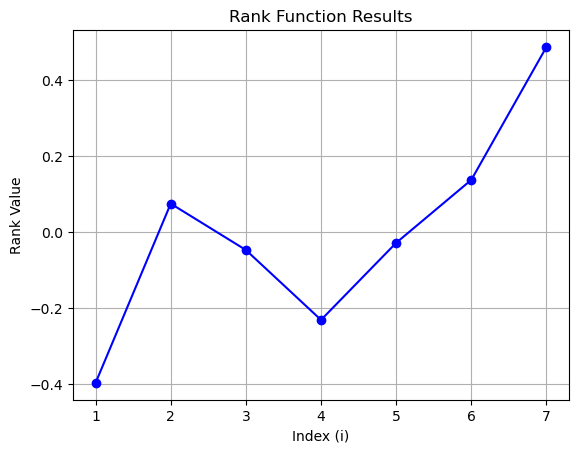

In [ ]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = []

# Set variables dynamically
for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank_method2(i, b, c, alpha_prime)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [ ]:
rank_method2(1, b, c, alpha_prime)



-0.3962623605189149

In [ ]:
rank_exp_j(1, p, q, n, alpha_prime, k_o, k_s)

-0.6118848326760276

In [ ]:
rank_method2(5, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime) 

0.3685022226254193

-0.6118848326760276
0.6352282656171114
-0.09225690769982074
-0.9186647312377344
0.04328103419958145
0.25089371617138345
0.6735581548615142
[-0.6118848326760276, 0.6352282656171114, -0.09225690769982074, -0.9186647312377344, 0.04328103419958145, 0.25089371617138345, 0.6735581548615142]


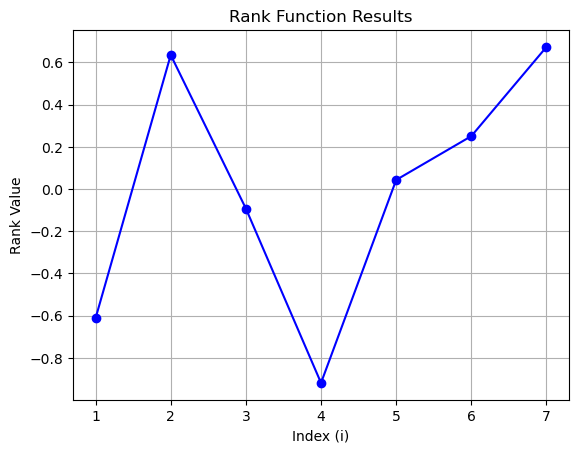

In [ ]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = []

# Set variables dynamically
for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank_exp_j(i, p, q, n, alpha_prime, k_o, k_s)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


0.6857382082054144
0.27351381523862683
0.0957298353335194
0.0
-0.0957298353335194
-0.27351381523862683
-0.6857382082054144
[0.6857382082054144, 0.27351381523862683, 0.0957298353335194, 0.0, -0.0957298353335194, -0.27351381523862683, -0.6857382082054144]


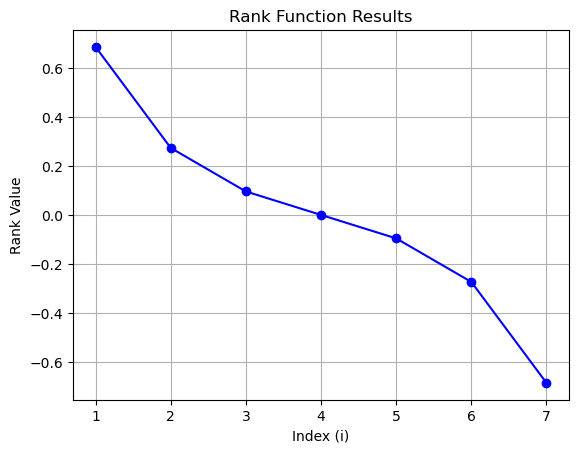

In [ ]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh((((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = []

# Set variables dynamically
for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank(alpha_prime, n, i)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [ ]:
def K_row_exp(j,k,p,q,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

print(K_row_exp(1,2,4,2,7,alpha_prime))

[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]


In [ ]:
for i in range (1, n):
    print(K_row_exp(i, i+1, 4, 2, 7, alpha_prime))
for i in range (1, n):
    print(K_row_exp(i+1, i, 4, 2, 7, alpha_prime))
print(K_row_exp(p, q, 4, 2, 7, alpha_prime))
print(K_row_exp(q, p, 4, 2, 7, alpha_prime))

print(K_exp)

[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
[0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
[0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
[0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
[0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ]
[0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.3]
[0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0. ]
[0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.3 0. ]
[0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.3]
[0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0. ]
[0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  1.  0.  0. ]
[0.3 0.  0.  0.3 0.  0.  0.  0.3 0.3 0.  0.  0.  1.  0. ]
[0.  0.3 0.3 0.  0.  0.  0.3 0.  0.  0.3 0.  0.  0.  1. ]
[[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
 [0.  0.  0

In [ ]:
j = 2
k = 5
print(delta(j, q))
print(rank_method2(k, b, c, alpha_prime) - rank_method2(j, b, c, alpha_prime))
print(K_row_exp(j,k,p,q,n,alpha_prime) @ a_exp)
print(K_row_exp(j,k,p,q,n,alpha_prime))

1
-0.10314796334936069
-0.1031479633493605
[0.  0.3 0.  0.3 0.  0.  0.3 0.  0.  0.  0.3 0.  0.  0.3]


In [ ]:
print(K_row_exp(2,5,4,2,7,alpha_prime))
print(K_row_exp(1,4,4,2,7,alpha_prime)@a_exp)
print(rank_method2(4, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime))
print(a_exp)
print(b)
print(c)

[0.  0.3 0.  0.3 0.  0.  0.3 0.  0.  0.  0.3 0.  0.  0.3]
0.16574435271704624
0.16574435271704596
[ 1.32087454  2.8048172   2.95994738  1.99310533  2.08563912  1.62569174
 -1.32087454 -2.8048172  -2.95994738 -1.99310533 -2.08563912 -1.62569174
  1.73523542 -1.73523542]
{1: 1.3208745350630497, 2: 2.804817200399165, 3: 2.959947382745169, 4: 1.9931053252290662, 5: 2.085639118207385, 6: 1.6256917354622153}
{1: 1.7352354168556658}


In [ ]:
print(K_row_exp(2,5,4,2,7,alpha_prime))
y_13 = K_row_exp(1,3,n,2,7,alpha_prime) @ a_exp
print(y_13)
rank_method2(3, b, c, alpha_prime) - rank_method2(1, b, c, alpha_prime)

for i in range(1,n+1):
    for j in range(1,n+1):
        if i == j or i == j+1 or j == i+1:
            continue
        print ('\n',i,j,':')
        print(K_row_exp(i,j,4,2,7,alpha_prime) @ a_exp)
        print(rank_method2(j, b, c, alpha_prime) - rank_method2(i, b, c, alpha_prime))

# for i in range(1,n+1):
#     for j in range(1,n+1):
#         if i == j+1 or j == i+1:
            
#             print(K_row(i,j,n,2,7,alpha_prime) @ a_exp)
#         else:
#             continue
        
for i in range(1, len(K_exp)):
    print (i,j,'\n')
    print(K_exp[:,i] @ a_exp)

print(K_exp@a_exp)
    

[0.  0.3 0.  0.3 0.  0.  0.3 0.  0.  0.  0.3 0.  0.  0.3]
0.3497233058151138

 1 3 :
0.3497233058151138
0.34972330581511374

 1 4 :
0.16574435271704624
0.16574435271704596

 1 5 :
0.36850222262541926
0.3685022226254193

 1 6 :
0.5342465753424658
0.5342465753424657

 1 7 :
0.8839698811575795
0.8839698811575795

 2 4 :
-0.9999999999999996
-0.30590583325773407

 2 5 :
-0.1031479633493605
-0.10314796334936069

 2 6 :
0.06259638936768597
0.0625963893676857

 2 7 :
0.4123196951827997
0.41231969518279943

 3 1 :
-0.34972330581511385
-0.34972330581511374

 3 5 :
0.01877891681030558
0.01877891681030559

 3 6 :
0.18452326952735199
0.18452326952735199

 3 7 :
0.5342465753424657
0.5342465753424657

 4 1 :
-0.16574435271704618
-0.16574435271704596

 4 2 :
1.0000000000000004
0.30590583325773407

 4 6 :
0.36850222262541965
0.36850222262541976

 4 7 :
0.7182255284405334
0.7182255284405334

 5 1 :
-0.3685022226254195
-0.3685022226254193

 5 2 :
0.1031479633493606
0.10314796334936069

 5 3 :
-0.01877891

In [ ]:
for i in range (0, n):
    print(K_exp[:,i], K_row_exp(i+1,i+2,4,2,7,alpha_prime) )

[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ] [1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
[0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3] [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
[0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3] [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
[0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ] [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ] [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
[0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ] [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ]
[0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.3] [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.  0. ]


In [ ]:
print(K)

[[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0. ]
 [0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  1. ]]


In [ ]:
K = k_create(n,alpha_prime)
print('K', '\n', K)
K_exp = k_create_excep(n, p, q, alpha_prime)
print('K_exp', '\n',K_exp)

K 
 [[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0. ]
 [0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.  0.  1. ]]
K_exp 
 [[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ]
 [0.  0.3 0.  0.  0. 

In [ ]:
print(K_row_exp(4,2,2,4,4,k_o)) 

[0.3 0.  0.  0.  0.3 0.3 0.  1. ]


In [ ]:


print(K_row_exp(1,2,4,2,4,k_o)) 
print(K_row_exp(2,3,4,2,4,k_o))
print(K_row_exp(3,4,4,2,4,k_o)) 
print(K_row_exp(2,1,4,2,4,k_o))
print(K_row_exp(3,2,4,2,4,k_o)) 
print(K_row_exp(4,3,4,2,4,k_o))
print(K_row_exp(4,2,4,2,4,k_o)) 
print(K_row_exp(2,4,4,2,4,k_o))

Arr = np.concatenate([
    K_row_exp(1,2,4,2,4,k_o).reshape(1, -1),
    K_row_exp(2,3,4,2,4,k_o).reshape(1, -1),
    K_row_exp(3,4,4,2,4,k_o).reshape(1, -1),
    K_row_exp(2,1,4,2,4,k_o).reshape(1, -1),
    K_row_exp(3,2,4,2,4,k_o).reshape(1, -1),
    K_row_exp(4,3,4,2,4,k_o).reshape(1, -1),
    K_row_exp(4,2,4,2,4,k_o).reshape(1, -1),
    K_row_exp(2,4,4,2,4,k_o).reshape(1, -1)
], axis=0)
print(Arr)

print(K_exp)

print(Arr == K_exp)

[1.  0.  0.  0.  0.3 0.  0.3 0. ]
[0.  1.  0.  0.3 0.  0.3 0.  0.3]
[0.  0.  1.  0.  0.3 0.  0.  0.3]
[0.  0.3 0.  1.  0.  0.  0.  0.3]
[0.3 0.  0.3 0.  1.  0.  0.3 0. ]
[0.  0.3 0.  0.  0.  1.  0.3 0. ]
[0.3 0.  0.  0.  0.3 0.3 1.  0. ]
[0.  0.3 0.3 0.3 0.  0.  0.  1. ]
[[1.  0.  0.  0.  0.3 0.  0.3 0. ]
 [0.  1.  0.  0.3 0.  0.3 0.  0.3]
 [0.  0.  1.  0.  0.3 0.  0.  0.3]
 [0.  0.3 0.  1.  0.  0.  0.  0.3]
 [0.3 0.  0.3 0.  1.  0.  0.3 0. ]
 [0.  0.3 0.  0.  0.  1.  0.3 0. ]
 [0.3 0.  0.  0.  0.3 0.3 1.  0. ]
 [0.  0.3 0.3 0.3 0.  0.  0.  1. ]]
[[1.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0. ]
 [0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.  0.3]
 [0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.  0.  0.3]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0.3 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 0.  0.  0. ]
 [0.  0.3 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.3]
 [0.3 0.  0.3 0.  0.  0.  0.  1.  

C:\Users\lukel\AppData\Local\Temp\ipykernel_83556\1425074244.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(Arr == K_exp)


In [ ]:
print(rank_exp_j(1,p,q,n,alpha_prime,k_o,k_s))
rank_method2(1, b, c, alpha_prime)

-0.6118848326760276


-0.3962623605189149

In [ ]:
B = (A-(np.identity(len(A)) * alpha_prime))

In [ ]:
a

array([ 1.66361974,  2.21206581,  2.37659963,  2.37659963,  2.21206581,
        1.66361974, -1.66361974, -2.21206581, -2.37659963, -2.37659963,
       -2.21206581, -1.66361974])

In [ ]:
np.linalg.inv(B) @ np.ones(n-1)

array([ 2.70029674,  1.81008902, -1.15727003, -1.15727003,  1.81008902,
        2.70029674])

In [ ]:
B

array([[-0.3,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. , -0.3,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. , -0.3,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -0.3,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. , -0.3,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. , -0.3]])

In [ ]:
n

7

In [ ]:
print((np.identity(n-1)-(np.identity(len(A)) * alpha_prime)))
B = np.linalg.inv((np.identity(n-1)- (A * alpha_prime)))
print(B)
print(B@np.ones(n-1))

[[0.7 0.  0.  0.  0.  0. ]
 [0.  0.7 0.  0.  0.  0. ]
 [0.  0.  0.7 0.  0.  0. ]
 [0.  0.  0.  0.7 0.  0. ]
 [0.  0.  0.  0.  0.7 0. ]
 [0.  0.  0.  0.  0.  0.7]]
[[1.11110925 0.37036418 0.123438   0.04109582 0.01354807 0.00406442]
 [0.37036418 1.23454725 0.41146    0.13698607 0.04516024 0.01354807]
 [0.123438   0.41146    1.24809532 0.41552442 0.13698607 0.04109582]
 [0.04109582 0.13698607 0.41552442 1.24809532 0.41146    0.123438  ]
 [0.01354807 0.04516024 0.13698607 0.41146    1.23454725 0.37036418]
 [0.00406442 0.01354807 0.04109582 0.123438   0.37036418 1.11110925]]
[1.66361974 2.21206581 2.37659963 2.37659963 2.21206581 1.66361974]


In [ ]:
#def rank(alpha, n, i):

def verif_array(arr1, arr2):
    for i in range(0, len(arr1)):
        print('arr1[i]', 'arr2[i]', arr1[i], arr2[i])
        if math.isclose(arr1[i], arr2[i], abs_tol = 1e-04):
            continue
        else:
            print('verif array failed at',i,j) 
            return 
    print('verif array succeeded')

def dict_to_array(dict_arr):
    arr = np.zeros(len(dict_arr))
    for i in range(1, len(dict_arr) + 1):
       arr[i-1] = dict_arr[i]  
    return arr

In [ ]:
print(B)
b_til = B @ np.ones(n-1)
print(b_til)
b_til_d = create_b_til_d(n)
print(b_til_d)
verif_array(b_til, dict_to_array(create_b_til_d(n)))
verif_array(b_til, dual_prev)
verif_array(dual_prev, dict_to_array(create_b_til_d(n)))

[[1.11110925 0.37036418 0.123438   0.04109582 0.01354807 0.00406442]
 [0.37036418 1.23454725 0.41146    0.13698607 0.04516024 0.01354807]
 [0.123438   0.41146    1.24809532 0.41552442 0.13698607 0.04109582]
 [0.04109582 0.13698607 0.41552442 1.24809532 0.41146    0.123438  ]
 [0.01354807 0.04516024 0.13698607 0.41146    1.23454725 0.37036418]
 [0.00406442 0.01354807 0.04109582 0.123438   0.37036418 1.11110925]]
[1.66361974 2.21206581 2.37659963 2.37659963 2.21206581 1.66361974]
{1: 1.663619744058501, 2: 2.2120658135283366, 3: 2.376599634369287, 4: 2.376599634369287, 5: 2.212065813528336, 6: 1.663619744058501}
arr1[i] arr2[i] 1.663619744058501 1.663619744058501
arr1[i] arr2[i] 2.2120658135283366 2.2120658135283366
arr1[i] arr2[i] 2.376599634369287 2.376599634369287
arr1[i] arr2[i] 2.376599634369287 2.376599634369287
arr1[i] arr2[i] 2.212065813528336 2.212065813528336
arr1[i] arr2[i] 1.663619744058501 1.663619744058501
verif array succeeded
arr1[i] arr2[i] 1.663619744058501 1.66361974405

In [ ]:
(create_b_til_d(n))

{1: 1.663619744058501,
 2: 2.2120658135283366,
 3: 2.376599634369287,
 4: 2.376599634369287,
 5: 2.212065813528336,
 6: 1.663619744058501}

In [ ]:
b_til_d

{1: 1.663619744058501,
 2: 2.2120658135283366,
 3: 2.376599634369287,
 4: 2.376599634369287,
 5: 2.212065813528336,
 6: 1.663619744058501}

In [ ]:
def rank_til_inv(j, n, alpha_prime, b_til_d):
    b_til_d = create_b_til_d(n)
    if j < 2 or j >= n:
        if j == 1:
            return alpha_prime * (-b_til_d[j])
        else:
            return 0 
    return alpha_prime * (b_til_d[j] - b_til_d[j-1])

-0.4990859232175503
0.1645338208409507
0.04936014625228511
0.0
-0.04936014625228524
-0.16453382084095056
0
[-0.4990859232175503, 0.1645338208409507, 0.04936014625228511, 0.0, -0.04936014625228524, -0.16453382084095056, 0]


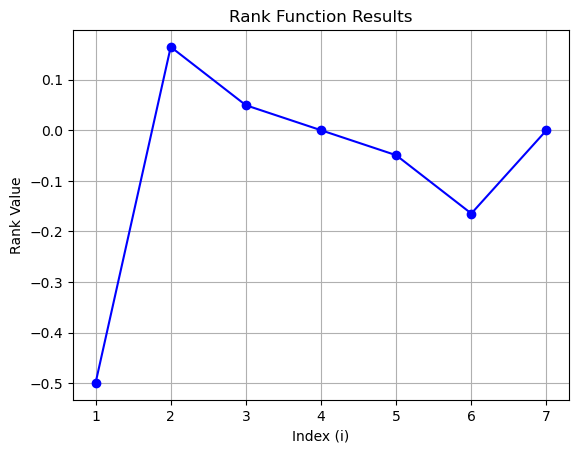

In [ ]:
index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = []

for i in range(1, n+1):
   rank_vals[f'r_{i}'] = rank_til_inv(i, n, alpha_prime, b_til_d)
   print(rank_vals[f'r_{i}'])
   rank_vals_array.append(rank_vals[f'r_{i}'])

print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()

In [ ]:
rank_til_inv(1, n, alpha_prime, b_til_d) - rank_til_inv(3, n, alpha_prime, b_til_d)

-0.5484460694698354

In [ ]:
a

array([ 1.66361974,  2.21206581,  2.37659963,  2.37659963,  2.21206581,
        1.66361974, -1.66361974, -2.21206581, -2.37659963, -2.37659963,
       -2.21206581, -1.66361974])

In [ ]:
b_til_d

{1: 1.663619744058501,
 2: 2.2120658135283366,
 3: 2.376599634369287,
 4: 2.376599634369287,
 5: 2.212065813528336,
 6: 1.663619744058501}

In [ ]:
rank_1 = alpha_prime * (b_til_d[1])
print(rank_1)

0.4990859232175503


In [ ]:
def K_row(j,k,n,alpha_prime):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2])



In [ ]:
a

array([ 1.66361974,  2.21206581,  2.37659963,  2.37659963,  2.21206581,
        1.66361974, -1.66361974, -2.21206581, -2.37659963, -2.37659963,
       -2.21206581, -1.66361974])

In [ ]:
c

{1: 1.7352354168556658}

In [ ]:
print(K_row(1,3,n,alpha_prime) @ a)
print(alpha_prime* (a[0]), rank_prev(alpha_prime, n, 1))
print(rank_prev(alpha_prime, n, 1) - rank_prev(alpha_prime, n, 3))
print(alpha_prime* (a[0]) + alpha_prime*(a[1] - a[2]))

l_trial = np.arccosh((1)/(1- ))

def rank_verif(j, n, l_trial):
    num = np.sinh((((n+1)/2)-j)*l_trial)
    denom = np.sinh(((n+1)/2)*l_trial) - np.sinh(((n+1)/2)*l_trial)
    return num / denom

print(rank_verif(1, n, )

SyntaxError: invalid syntax (1849407118.py, line 6)